In [1]:
# GPU scaling lidDrivenCavity
# comparison OF + DIC vs GKO and var. preconditioner
import matplotlib.pyplot as plt
import numpy as np
from import_benchmark_data import import_results
from helpers import idx_query, idx_keep_only, compute_speedup

plt.rcParams.update({'font.size': 18})

No Salvia installation found
Owls Version: 0.10.0-26-g31283c0
Warning no matplotlib support


In [2]:
def line_plot(df, x, columns, facet, properties, 
              fig, axes, kind="line", x_label=None, 
              facet_is_legend=False):
    lines = list(set(df.index.get_level_values(facet)))
    lines.sort()
    default_colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
    for i, q in enumerate(columns):
        for j,line in enumerate(lines):
            sel = df[df.index.get_level_values(facet) == line]
            sel = idx_keep_only(sel,  keep=[x])
            ax = axes[i]
            legends = properties.get("legends")
            legend = line  if facet_is_legend else False
            f = sel.sort_index().plot(
                legend=True,
                label=legend,
                lw=3,
                ms=10,
                kind=kind,
                ax=ax,
                linestyle=properties.get("linestyle", lambda x: "-")(line),
                marker=properties["marker"](line),
                color=properties.get("color", lambda x: default_colors[j])(line),
            )
            if x_label:
                ax.set_xlabel(x_label[i])
            if legends:
                plt.legend(legends)

In [4]:
def calc_nodes(df, sel, masks):
    df["nodes"] = df.index.get_level_values('mpi_ranks')
    for sel_value, value in masks:
        mask = df.index.get_level_values(sel) == sel_value
        df.loc[mask,"nodes"] = df.loc[mask, "nodes"]/value
    df = df.set_index("nodes", append=True)
    return df

## Number Iterations Scotch vs Simple OF

../../results/f66ef73d/lidDrivenCavity/simple/Logs
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
../../results/93635822/lidDrivenCavity/scaling/Logs
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in posit

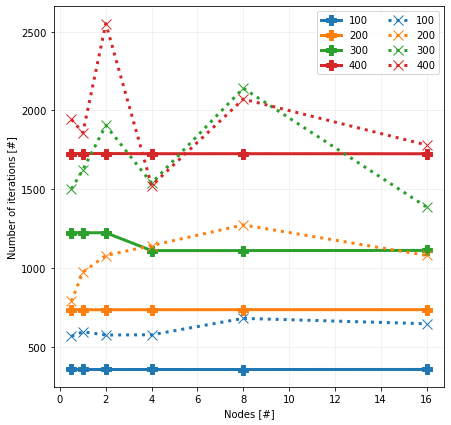

In [77]:
columns = ["linear_solve_p"]

fig, axes = plt.subplots(1,
                        len(columns),
                        figsize=(7 * len(columns), 7),
                        sharex=False,
                        sharey=False,
                        gridspec_kw={'wspace': 0.5},
                        subplot_kw={'frameon': True})
axes.set_ylabel("Number of iterations [#]")

axes = [axes]

for revision, marker, linestyle, cpu, case  in [("f66ef73d","P","-", 64, "simple"), ("93635822","x", ":", 76, "scaling")]:
    path = "../../results/{}/lidDrivenCavity/".format(revision)
    df = import_results(
        path=path,
        case=case,        
        short_hostname_map={
            "nla": "nla",
            "hkn": "horeka"
        },
        transform_resolution=False
        )["raw"]


    df = idx_query(df, 
            [
                ("solver_p", "CG"),
                ("node", "horeka", True)
            ])

    df = df.drop(["init_precond", "update_host_matrix", "retrieve_results", "log_id", "timestamp"] ,axis=1)
    df = calc_nodes(df, "executor_p", [("DefaultOF", cpu), ("CUDA",4)])

    data = idx_query(df, [
            ("executor_p", "DefaultOF"),
            ("nodes", 64, False),
            ("resolution", 500, False),
            ("nodes", 32, False),
        ]).sort_index()

    line_plot(data["number_iterations_p"], 
            x="nodes", 
            columns=columns, 
            facet="resolution",
            #fn='../results/cur/lidDrivenCavity/gko_vs_of_linear_solve_vs_precond.png',
            fig=fig,
            axes=axes,
            facet_is_legend=True,
            properties={
            "linestyle": lambda x: linestyle,
            "marker": lambda x: marker,
            "title": lambda x: ["Linear Solve P"][x]
        })

for ax in axes:
    ax.grid(True, axis='x', which="both", alpha=0.2)
    ax.grid(True, axis='y', which="both", alpha=0.2)
    ax.grid(True, axis="y", which="minor", alpha=0.2)
    ax.set_xlabel("Nodes [#]")
    
plt.legend(ncol=2)#, loc="top center")
print(path, case)
plt.savefig(path + case +  "/number_iterations_scotch_vs_simple_dd.png", bbox_inches='tight')

../../results/f66ef73d/lidDrivenCavity/simple/Logs
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
../../results/93635822/lidDrivenCavity/scaling/Logs
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
'utf-8' codec can't decode byte 0x89 in posit

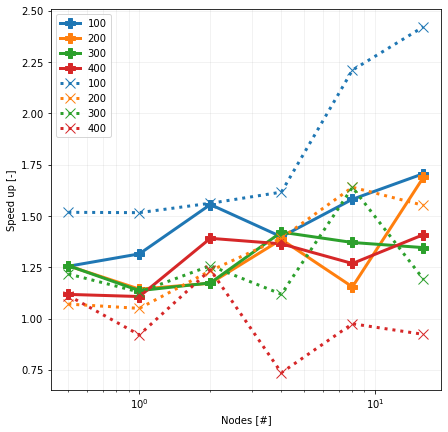

In [78]:
columns = ["linear_solve_p"]

fig, axes = plt.subplots(1,
                        len(columns),
                        figsize=(7 * len(columns), 7),
                        sharex=False,
                        sharey=False,
                        gridspec_kw={'wspace': 0.5},
                        subplot_kw={'frameon': True})
axes.set_ylabel("Speed up [-]")

axes = [axes]
dfs = {}

for revision, marker, linestyle, cpu, case  in [("f66ef73d","P","-", 64, "simple"), ("93635822","x", ":", 76, "scaling")]:
    path = "../../results/{}/lidDrivenCavity/".format(revision)
    df_tmp = import_results(
        path=path,
        case=case,        
        short_hostname_map={
            "nla": "nla",
            "hkn": "horeka"
        },
        transform_resolution=False
        )["raw"]
    df_tmp["base"] = cpu
    df_tmp = df_tmp.set_index("base", append=True)
    df_tmp["method"] = case
    df_tmp = df_tmp.set_index("method", append=True)
    dfs[revision] = df_tmp

    
df_c = pd.concat([dfs["f66ef73d"], dfs["93635822"]])
df = df_c.drop(["init_precond", "update_host_matrix", "retrieve_results", "log_id", "timestamp"] ,axis=1)

df_of = idx_query(df, [
        ("executor_p", "DefaultOF"),
        ("resolution", 500, False),
    ]).sort_index()

df_of = calc_nodes(df_of, "base", [(76, 76), (64, 64)])


data_s_of = compute_speedup(df_of,
        [("base", 76),
         ("executor_p", "DefaultOF")
        ],
        drop_indices=["node", "processes", "mpiRank_gko", "omp_threads", "mpi_ranks", "mpiRank_of", "method"],
        )

data_of = idx_query(data_s_of, [
        ("base", 64),
        ("executor_p", "DefaultOF"),
        ("resolution", 500, False),
    ]).sort_index()


###################################

df_gko = idx_query(df, [
        ("executor_p", "CUDA"),
        ("resolution", 500, False),
    ]).sort_index()

df_gko = calc_nodes(df_gko, "executor_p", [("CUDA", 4)])


data_s_gko = compute_speedup(df_gko,
        [("method", "scaling"),
        ],
        drop_indices=["node", "processes", "mpiRank_gko", "omp_threads", "mpi_ranks", "mpiRank_of", "base"],
        )

data_gko = idx_query(data_s_gko, [
        ("method", "simple"),
        ("resolution", 500, False),
    ]).sort_index()




for data, marker, linestyle  in [(data_gko,"P","-"), (data_of,"x", ":")]:
    line_plot(data["linear_solve_p"], 
        x="nodes", 
        columns=columns, 
        facet="resolution",
        #fn='../results/cur/lidDrivenCavity/gko_vs_of_linear_solve_vs_precond.png',
        fig=fig,
        axes=axes,
        facet_is_legend=True,
        properties={
        "linestyle": lambda x: linestyle,
        "marker": lambda x: marker,
        "title": lambda x: ["Linear Solve P"][x]
    })

for ax in axes:
        ax.grid(True, axis='x', which="both", alpha=0.2)
        ax.grid(True, axis='y', which="both", alpha=0.2)
        ax.grid(True, axis="y", which="minor", alpha=0.2)
        ax.set_xlabel("Nodes [#]")
        #ax.set_yscale('log')
        ax.set_xscale('log')


plt.savefig(path + case + "/speed_up_dd.png", bbox_inches='tight')